In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns



# To Plot matplotlib figures inline on the notebook
%matplotlib inline

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [2]:
datafile = 'ModelData1.csv'
df = pd.read_csv(datafile)

#convert Release_Date column to a datetime object
from dateutil.parser import *

def toDT(d):
    if d == np.nan or d == 'nan': return np.nan
    try:
        date = parse(d)
        return date.timestamp()
    except (ValueError,TypeError): return np.nan

df['Release_Date'] = df['Release_Date'].map(toDT)
df.head()
#note, can't re-run this without the code above, as it changes data in place

df.head(12)

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,9.731e+08,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,1.129e+09,NaN,NaN,NaN,NaN,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,NaN,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,1.227e+09,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,1.194e+09,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,1.258e+09,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720
5,5,10220,Postal 3,0,-1,-1,-1,0,1.324e+09,NaN,NaN,NaN,NaN,11.99,4.79,60.0,0,24.0,0,-1,-1,2,0,7.830e+04,8137.0,6.901e+04,88.14,2491.0,3.18,2.1,7.1,3,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,4.894
6,6,102400,Vertex Dispenser,0,1,1,0,1,1.308e+09,NaN,NaN,NaN,NaN,9.99,4.99,50.0,0,70.0,0,-1,-1,0,0,3.304e+04,4840.0,1.299e+04,39.33,0.0,0.00,NaN,NaN,5,1,2.0,1,1,1,0,0,0,0,0,0,0,0,0,4.519
7,7,10250,PT Boats: Knights of the Sea,0,-1,-1,-1,0,1.233e+09,NaN,NaN,NaN,NaN,6.99,2.49,75.0,0,NaN,-1,-1,-1,0,0,1.151e+04,2856.0,9.837e+03,85.49,0.0,0.00,1.4,2.7,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.061
8,8,102500,Kingdoms of Amalur: Reckoning™,0,-1,-1,-1,0,1.329e+09,0.0,100.0,87.28,7748.0,19.99,4.39,78.0,3,81.0,0,-1,-1,5,0,8.919e+05,27437.0,7.470e+05,83.76,19465.0,2.18,9.2,26.6,6,4,13.0,1,0,0,0,1,0,0,0,0,0,0,0,5.950
9,9,10260,PT Boats: South Gambit,0,-1,-1,-1,0,1.292e+09,NaN,NaN,NaN,NaN,6.99,2.49,75.0,0,NaN,-1,-1,-1,0,0,1.132e+04,2833.0,6.867e+03,60.65,0.0,0.00,NaN,2.0,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.054


In [3]:
#filter filter out free and price errored games, and set all NaN to -1

df = df.fillna(value=-1)
#df = df.loc[df['Price'] >= 0,:]
df.head(12)

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,9.731e+08,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,1.129e+09,-1.0,-1.0,-1.00,-1.0,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,-1.0,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,1.227e+09,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,1.194e+09,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,1.258e+09,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720
5,5,10220,Postal 3,0,-1,-1,-1,0,1.324e+09,-1.0,-1.0,-1.00,-1.0,11.99,4.79,60.0,0,24.0,0,-1,-1,2,0,7.830e+04,8137.0,6.901e+04,88.14,2491.0,3.18,2.1,7.1,3,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,4.894
6,6,102400,Vertex Dispenser,0,1,1,0,1,1.308e+09,-1.0,-1.0,-1.00,-1.0,9.99,4.99,50.0,0,70.0,0,-1,-1,0,0,3.304e+04,4840.0,1.299e+04,39.33,0.0,0.00,-1.0,-1.0,5,1,2.0,1,1,1,0,0,0,0,0,0,0,0,0,4.519
7,7,10250,PT Boats: Knights of the Sea,0,-1,-1,-1,0,1.233e+09,-1.0,-1.0,-1.00,-1.0,6.99,2.49,75.0,0,-1.0,-1,-1,-1,0,0,1.151e+04,2856.0,9.837e+03,85.49,0.0,0.00,1.4,2.7,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.061
8,8,102500,Kingdoms of Amalur: Reckoning™,0,-1,-1,-1,0,1.329e+09,0.0,100.0,87.28,7748.0,19.99,4.39,78.0,3,81.0,0,-1,-1,5,0,8.919e+05,27437.0,7.470e+05,83.76,19465.0,2.18,9.2,26.6,6,4,13.0,1,0,0,0,1,0,0,0,0,0,0,0,5.950
9,9,10260,PT Boats: South Gambit,0,-1,-1,-1,0,1.292e+09,-1.0,-1.0,-1.00,-1.0,6.99,2.49,75.0,0,-1.0,-1,-1,-1,0,0,1.132e+04,2833.0,6.867e+03,60.65,0.0,0.00,-1.0,2.0,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.054


In [4]:
df = df.set_index(df.Name)
ownersort = df.owners.sort_values(ascending=False)
ownersort.head(20)

Name
Dota 2                              1.045e+08
Team Fortress 2                     4.034e+07
Counter-Strike: Global Offensive    3.066e+07
Unturned                            2.996e+07
Left 4 Dead 2                       1.749e+07
Warframe                            1.675e+07
PAYDAY 2                            1.552e+07
Counter-Strike: Source              1.547e+07
Heroes & Generals                   1.468e+07
Half-Life 2: Deathmatch             1.419e+07
Garry's Mod                         1.359e+07
Counter-Strike                      1.344e+07
Robocraft                           1.235e+07
Paladins                            1.204e+07
War Thunder                         1.154e+07
Counter-Strike: Condition Zero      1.092e+07
Portal 2                            1.025e+07
Sid Meier's Civilization V          1.018e+07
Terraria                            8.895e+06
Trove                               8.159e+06
Name: owners, dtype: float64

In [42]:
sns.set_style("whitegrid")

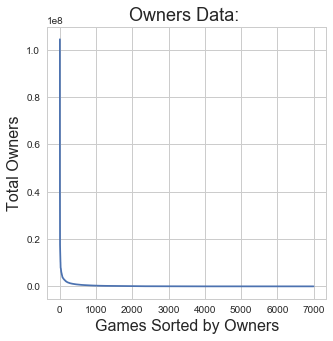

In [50]:
#plt.xticks=ownersort.index
#plt.plot(range(len(ownersort)),ownersort)

fig, ax =  plt.subplots(figsize=(5, 5))
#ax.set_yscale('log')
ax.set_title("Owners Data: ",fontsize=18)
ax.set_ylabel("Total Owners",fontsize=16)
ax.set_xlabel("Games Sorted by Owners",fontsize=16)

ax.plot(range(len(ownersort)),ownersort);

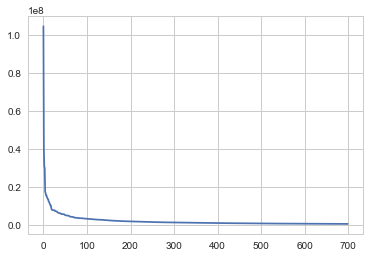

In [44]:
plt.plot(range(len(ownersort[:700])),ownersort[:700])

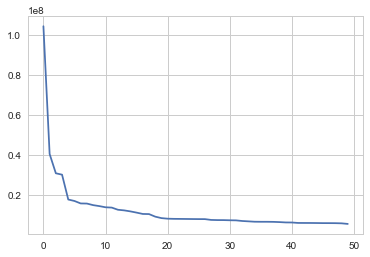

In [45]:
plt.plot(range(len(ownersort[:50])),ownersort[:50])

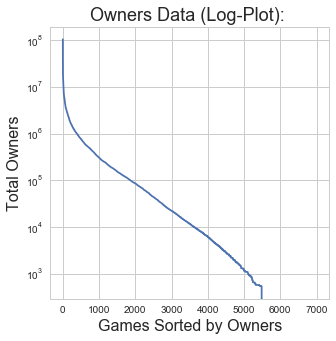

In [51]:

fig, ax =  plt.subplots(figsize=(5, 5))
ax.set_yscale('log')
ax.set_title("Owners Data (Log-Plot): ",fontsize=18)
ax.set_ylabel("Total Owners",fontsize=16)
ax.set_xlabel("Games Sorted by Owners",fontsize=16)

ax.plot(range(len(ownersort)),ownersort);

In [52]:
Pricesort = df.Price.sort_values(ascending=False)
Pricesort.head(20)

Name
Command: Modern Air / Naval Operations WOTY    79.99
Gary Grigsby's War in the East                 79.99
FritzChess 15                                  64.99
SEGA Mega Drive & Genesis Classics             61.99
Agents of Mayhem                               59.99
X-Plane 11                                     59.99
ARK: Survival Of The Fittest                   59.99
A-Train PC Classic / みんなのA列車で行こうPC             59.99
DRAGON QUEST HEROES™ II                        59.99
F1 2016                                        59.99
NieR:Automata™                                 59.99
XCOM 2                                         59.99
Attack on Titan / A.O.T. Wings of Freedom      59.99
Rise of the Tomb Raider                        59.99
Grand Theft Auto V                             59.99
NBA 2K18                                       59.99
South Park The Fractured But Whole             59.99
Assassin's Creed Origins                       59.99
DiRT 4                                   

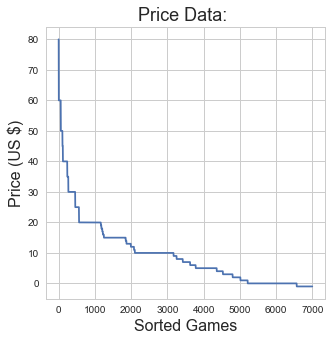

In [55]:

fig, ax =  plt.subplots(figsize=(5, 5))
#ax.set_yscale('log')
ax.set_title("Price Data: ",fontsize=18)
ax.set_ylabel("Price (US $)",fontsize=16)
ax.set_xlabel("Sorted Games",fontsize=16)

ax.plot(range(len(Pricesort)),Pricesort);

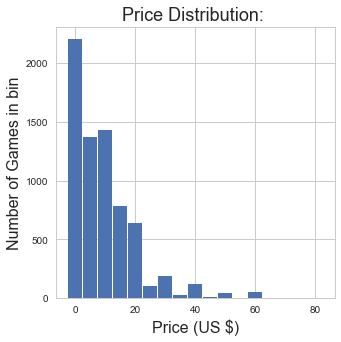

In [68]:
fig, ax =  plt.subplots(figsize=(5, 5))
#ax.set_yscale('log')
ax.set_title("Price Distribution: ",fontsize=18)
ax.set_ylabel("Number of Games in bin",fontsize=16)
ax.set_xlabel("Price (US $)",fontsize=16)

ax.hist(Pricesort,np.linspace(-2.5,82.5,18),rwidth=0.9);

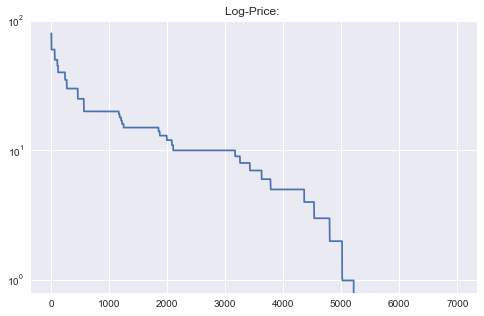

In [11]:
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_yscale('log')
ax.set_title("Log-Price: ")
ax.plot(range(len(Pricesort)),Pricesort);

In [83]:
dfnew = df.loc[df['average_total_playtime'] >= 0,:]
dfnew = dfnew.loc[dfnew['median_total_playtime'] >= 0,:]
avgsort = dfnew.average_total_playtime.sort_values(ascending=False)
newsort.head(20)
medsort = dfnew.median_total_playtime.sort_values(ascending=False)
medsort.head(20)

Name
Q.U.I.R.K.                            253.9
Lux Alliance                          175.5
Music Wars Empire                     160.9
Mega Overload                         153.6
Overpower                             119.5
Football Manager 2017                 115.0
Front Wars                            103.7
Illyriad - 4X Grand Strategy MMO       90.4
Battlezone                             89.6
LOGistICAL                             82.6
Counter-Strike: Global Offensive       82.6
Drunk Wizards                          78.4
Strategy & Tactics: Dark Ages          66.8
Grand Theft Auto V                     65.7
Cricket Captain 2014                   65.7
Rugby Challenge 3                      62.9
A-Train PC Classic / みんなのA列車で行こうPC     56.9
Fallout 4                              56.8
Cladun Returns: This Is Sengoku!       56.7
DvDrum, Ultimate Drum Simulator!       53.4
Name: median_total_playtime, dtype: float64

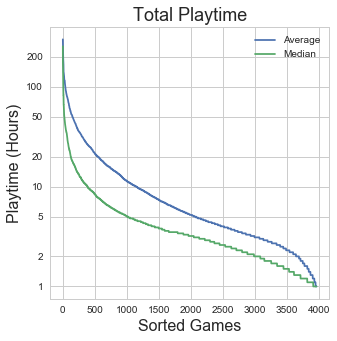

In [105]:

fig, ax =  plt.subplots(figsize=(5, 5))
ax.set_yscale('log')
ax.set_title("Total Playtime",fontsize=18)
ax.set_ylabel("Playtime (Hours)",fontsize=16)
ax.set_xlabel("Sorted Games",fontsize=16)
ax.set_yticks([1,2,5,10,20,50,100,200])
ax.set_yticklabels(([1,2,5,10,20,50,100,200]))
ax.plot(range(len(avgsort)),avgsort)
ax.plot(range(len(medsort)),medsort)
ax.legend( ('Average', 'Median'), loc='upper right');

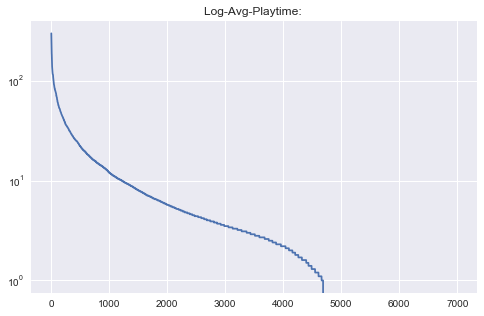

In [14]:
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_yscale('log')
ax.set_title("Log-Avg-Playtime: ")
ax.plot(range(len(newsort)),newsort);

In [69]:
newsort = df.median_total_playtime.sort_values(ascending=False)
newsort.head(20)

Name
Q.U.I.R.K.                            253.9
Lux Alliance                          175.5
Music Wars Empire                     160.9
Mega Overload                         153.6
Overpower                             119.5
Football Manager 2017                 115.0
Front Wars                            103.7
Illyriad - 4X Grand Strategy MMO       90.4
Battlezone                             89.6
LOGistICAL                             82.6
Counter-Strike: Global Offensive       82.6
Drunk Wizards                          78.4
Strategy & Tactics: Dark Ages          66.8
Cricket Captain 2014                   65.7
Grand Theft Auto V                     65.7
Rugby Challenge 3                      62.9
A-Train PC Classic / みんなのA列車で行こうPC     56.9
Fallout 4                              56.8
Cladun Returns: This Is Sengoku!       56.7
DvDrum, Ultimate Drum Simulator!       53.4
Name: median_total_playtime, dtype: float64

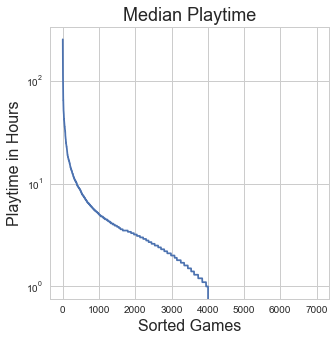

In [72]:
fig, ax =  plt.subplots(figsize=(5, 5))
ax.set_yscale('log')
ax.set_title("Median Playtime",fontsize=18)
ax.set_ylabel("Playtime in Hours",fontsize=16)
ax.set_xlabel("Sorted Games",fontsize=16)

ax.plot(range(len(newsort)),newsort);

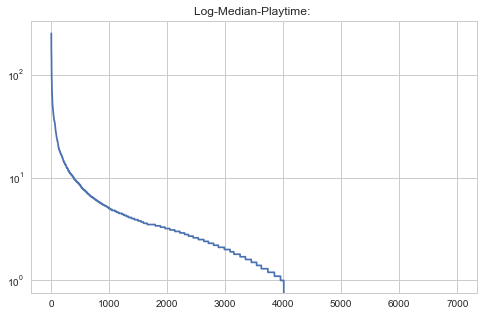

In [71]:
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_yscale('log')
ax.set_title("Log-Median-Playtime: ")
ax.plot(range(len(newsort)),newsort);